# Trabalhando com Planilha

In [1]:
import pandas as pd


In [6]:
#Leitura de Arquivos

df1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Pandas/Aracaju.xlsx")
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Pandas/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Pandas/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Pandas/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Pandas/Salvador.xlsx')

In [11]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [13]:
#juntando os arquivos

df = pd.concat([df1,df2,df3,df4,df5])

In [16]:
df.head(5)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [17]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [18]:
df.sample(5) #ver sortidos

,Cidade,Data,Vendas,LojaID,Qtde
115,Salvador,2019-03-02,202.33,1035,2
187,Natal,2019-01-02,3.85,1035,3
114,Salvador,2019-03-02,25.52,1034,1
58,Fortaleza,2019-01-01,38.90,1004,4
14,Aracaju,2018-01-01,148.21,1521,3


In [20]:
df.dtypes #tipos dos dados

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [21]:
#Alterando o tipo de dados

df['LojaID'] = df['LojaID'].astype('object')

In [22]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [23]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


#Tratando valores faltantes(Nulos)

In [24]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [30]:
#substituindo valores nulos
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)


In [31]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [32]:
df['Vendas'].mean()

122.61180089485438

In [47]:
#Substituindo os valores nulos por zero
df['Vendas'].fillna(0,inplace=True)

In [34]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [37]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Vendas'],inplace=True)

In [39]:
#Removendo linas que estejam com valores faltantes em todas as colunas
df.dropna(how='all',inplace=True)

# Criando colunas

In [91]:
df["Receita"] = df["Vendas"].mul(df['Qtde'])


In [49]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Ps. Se vc quiser encontrar a qtd de produto e não tivesse descrito poderia
#criar uma nova coluna dividindo a receita por vendas
# ficaria assim 
# df["Receita/Vendas"]= df["Receita]/ df["Vendas"]
#df.head() - para visuaizar a coluna criada


In [50]:
#Retornando a maior receita
df['Receita'].max()

3544.0

In [51]:
#Retornando a menor receita

df['Receita'].min()

3.34

In [45]:
#nlargest
df.nlargest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [53]:
#nsamllest
df.nsmallest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [54]:
#Agrupamento por Cidade
df.groupby("Cidade")['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [55]:
#Ordenando o conjunto de dados
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0



# Trabalhando com datas


In [56]:
#Transformando a coluna de data em tipo inteiro
df["Data"]= df["Data"].astype("int64")

In [57]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [58]:
#Transformando coluna de data em data
df['Data']=pd.to_datetime(df['Data'])

In [60]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [61]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [63]:
#Criando uma nova coluna o ano
df['Ano']= df["Data"].dt.year
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018


In [64]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019
129,Salvador,2019-03-02,125.66,1037,1,125.66,2019
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
105,Aracaju,2018-01-01,24.81,1520,5,124.05,2018
177,Natal,2019-01-02,41.19,1037,2,82.38,2019


In [65]:
#Extraindo o mês e o dia
df['mes_dia'], df["dia_venda"] = (df["Data"].dt.month,df["Data"].dt.day)

In [66]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,mes_dia,dia_venda
134,Recife,2019-03-02,195.18,980,5,975.90,2019,3,2
82,Salvador,2019-01-01,207.88,1035,1,207.88,2019,1,1
120,Natal,2019-01-02,140.17,1036,2,280.34,2019,1,2
8,Natal,2019-03-27,667.00,852,4,2668.00,2019,3,27
98,Salvador,2019-01-01,231.76,1036,3,695.28,2019,1,1


In [68]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [69]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [70]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,mes_dia,dia_venda,diferenca_dias
91,Fortaleza,2019-01-01,37.49,1002,1,37.49,2019,1,1,365 days
122,Recife,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days
53,Fortaleza,2019-01-01,11.48,1002,4,45.92,2019,1,1,365 days
70,Salvador,2019-01-01,39.06,1034,3,117.18,2019,1,1,365 days
53,Recife,2019-01-01,37.05,983,6,222.30,2019,1,1,365 days


In [71]:
#Criando a coluna de trimestre
df["trimestre_vendas"] = df["Data"].dt.quarter

In [72]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,mes_dia,dia_venda,diferenca_dias,trimestre_vendas
223,Salvador,2019-01-02,40.51,1037,2,81.02,2019,1,2,366 days,1
127,Fortaleza,2019-03-02,39.56,982,8,316.48,2019,3,2,425 days,1
191,Salvador,2019-01-02,173.59,1034,2,347.18,2019,1,2,366 days,1
111,Salvador,2019-03-02,147.35,1037,2,294.70,2019,3,2,425 days,1
196,Salvador,2019-01-02,145.09,1036,2,290.18,2019,1,2,366 days,1


In [73]:
#filtrando as vendas de 2019 do mês de fevereiro
vendas_fev_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 2)]

In [76]:
vendas_fev_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,mes_dia,dia_venda,diferenca_dias,trimestre_vendas
2,Fortaleza,2019-02-10,35.33,1004,3,105.99,2019,2,10,405 days,1
3,Fortaleza,2019-02-10,20.95,1004,6,125.70,2019,2,10,405 days,1
7,Fortaleza,2019-02-11,35.50,1003,2,71.00,2019,2,11,406 days,1
8,Fortaleza,2019-02-11,37.49,1005,1,37.49,2019,2,11,406 days,1
13,Fortaleza,2019-02-12,118.58,1003,4,474.32,2019,2,12,407 days,1
40,Fortaleza,2019-02-13,19.13,1002,4,76.52,2019,2,13,408 days,1
41,Fortaleza,2019-02-13,191.29,1002,3,573.87,2019,2,13,408 days,1
11,Natal,2019-02-09,564.00,853,3,1692.00,2019,2,9,404 days,1
12,Natal,2019-02-02,709.00,853,3,2127.00,2019,2,2,397 days,1
21,Natal,2019-02-08,679.00,853,2,1358.00,2019,2,8,403 days,1


#Visualização de dados

In [77]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

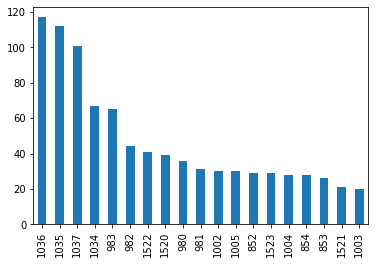

In [78]:
# Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

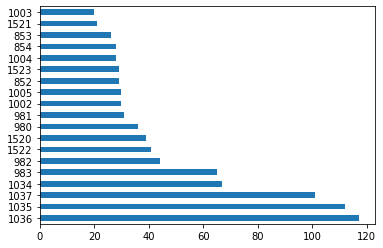

In [79]:
#Grafico de baras horizontais
df["LojaID"].value_counts().plot.barh()

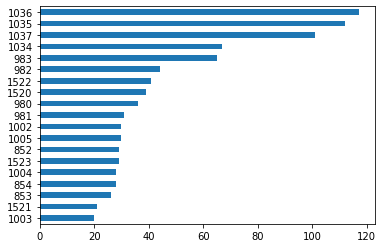

In [80]:
#Grafico de barras horizontais 2
df["LojaID"].value_counts(ascending=True).plot.barh()

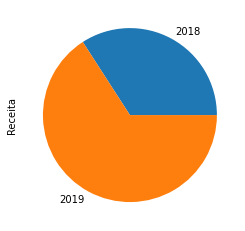

In [81]:
#Gráfico pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [82]:
#Total vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

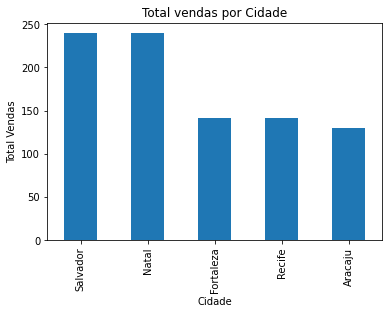

In [83]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

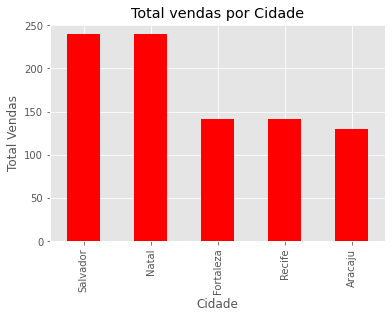

In [88]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color = 'red')
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [84]:
#Alterando o estilo
plt.style.use("ggplot")

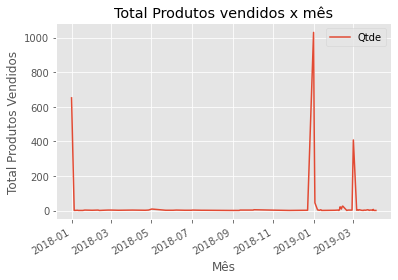

In [86]:
df.groupby(df["Data"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")

plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [87]:
df.groupby(df["Data"])["Qtde"].sum()

Data
2018-01-01    652
2018-01-05      2
2018-01-10      3
2018-01-11      2
2018-01-15      2
             ... 
2019-03-30      4
2019-03-31      2
2019-04-01      8
2019-04-02      2
2019-04-05      2
Name: Qtde, Length: 76, dtype: int64

In [92]:
#Selecionando apenas as vendas 2019
df_2019 = df[df["Ano"] == 2019]

In [93]:
df_2019.groupby(df_2019["Data"])["Qtde"].sum()

Data
2019-01-01    1030
2019-01-02     445
2019-01-03      46
2019-01-07       5
2019-01-08       4
2019-01-10       3
2019-01-12       6
2019-01-13       2
2019-02-02       3
2019-02-07       4
2019-02-08       2
2019-02-09       5
2019-02-10      23
2019-02-11      16
2019-02-12      10
2019-02-13      24
2019-02-14      27
2019-02-20       2
2019-02-22       4
2019-02-24       4
2019-02-28       4
2019-03-02     409
2019-03-07       3
2019-03-08       4
2019-03-09       5
2019-03-10       3
2019-03-11       6
2019-03-14       3
2019-03-17       2
2019-03-18       4
2019-03-20       3
2019-03-24       6
2019-03-26       2
2019-03-27       4
2019-03-30       4
2019-03-31       2
2019-04-01       8
2019-04-02       2
2019-04-05       2
Name: Qtde, dtype: int64

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

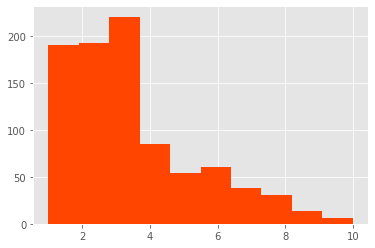

In [100]:
#Hisograma
plt.hist(df["Qtde"],color='orangered')



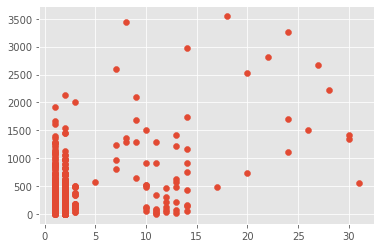

In [95]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019['Receita']);

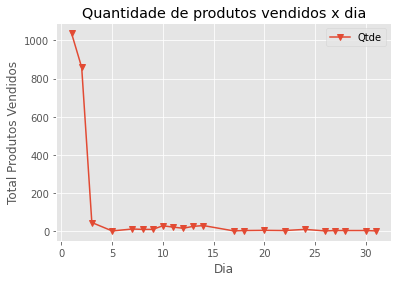

In [98]:
#Salvando em png
df_2019.groupby(df_2019['dia_venda'])["Qtde"].sum().plot(marker = 'v')
plt.title("Quantidade de produtos vendidos x dia")
plt.xlabel("Dia")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x Dia.png")